#### P3HT

##### parameterize with espaloma

In [1]:
import warnings 
warnings.filterwarnings('ignore')
from functions.working_esp_func import espaloma, build_polymer

/Users/Madilyn/miniconda3/envs/espaloma_test/lib/python3.10/site-packages/mdtraj/geometry/order.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import parse_version
/Users/Madilyn/miniconda3/envs/espaloma_test/lib/python3.10/site-packages/pkg_resources/__init__.py:2832: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/Users/Madilyn/miniconda3/envs/espaloma_test/lib/python3.10/site-packages/mbuild/recipes/__init__.py:13: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  entry_points = metadata.entry_points()["mbuild.plugins"]
/Users/Madilyn/miniconda3/envs/espaloma_test/lib/python3.10/site-pa

In [13]:
import warnings 
warnings.filterwarnings('ignore')
from functions.working_esp_func import espaloma, build_polymer
from classes.mon_classes import PCPDTFBT_C3_BO, PCPDTFBT_C5_BO, PCPDTFBT_C11_BO, PIDTFBT_C11_BO, PIDTCPDT_C11BO

xml_filepath = "xml_files2/PCPDTFBT_C4_BO.xml"
typed_filepath = "mol2files/PCPDTFBT_C4_BO.mol2"

espaloma(MONOMER=PIDTBT_nC16(),
         XML_FILEPATH=xml_filepath,
         TYPED_FILEPATH=typed_filepath,
         DIMER=True)

Done!


In [2]:
import mbuild as mb
mb.load(typed_filepath).visualize()

/Users/Madilyn/miniconda3/envs/espaloma_test/lib/python3.10/site-packages/mdtraj/geometry/order.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import parse_version
/Users/Madilyn/miniconda3/envs/espaloma_test/lib/python3.10/site-packages/pkg_resources/__init__.py:2832: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/Users/Madilyn/miniconda3/envs/espaloma_test/lib/python3.10/site-packages/mbuild/recipes/__init__.py:13: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  entry_points = metadata.entry_points()["mbuild.plugins"]


NameError: name 'typed_filepath' is not defined

In [15]:
! ls mol2files/

P3HT.mol2           PCPDTPT_HD.mol2     PIDTBT_nC16.mol2
PCPDTFBT_C4_BO.mol2 PCPDTPT_ODD.mol2    perylene.mol2


In [16]:
! ls xml_files2/

P3HT.xml           PCPDTPT_HD.xml     PIDTBT_nC16.xml
PCPDTFBT_C4_BO.xml PCPDTPT_ODD.xml    perylene.xml


In [2]:
import mbuild as mb
typed_filepath = "mol2files/PCPDTPT_ODD.mol2"

typed = mb.load(typed_filepath)
typed.visualize().show()

'''for some reason is we visualize using the nglview it renames the atoms without the proper types,
so if we use nglview to determine atom indices for polymer bonds we have to create its own instance so it doesn't
mess with the atom typing'''
idx_mol = mb.load(typed_filepath)
idx_mol.visualize(backend='nglview')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

NGLWidget()

##### Build polymer

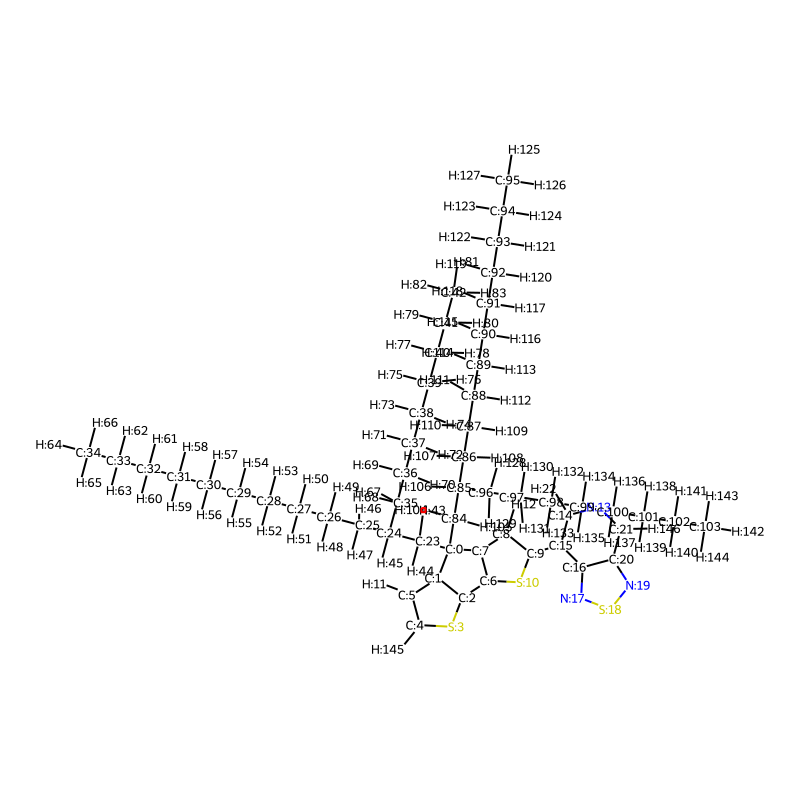

In [3]:
from rdkit.Chem.Draw import IPythonConsole

#Use rdkit to determine what indices you need to make your parameterization bonds at

IPythonConsole.molSize = (800, 800)   # Change image size
IPythonConsole.ipython_useSVG = True  # Change output to SVG
mol = typed.to_rdkit()
display(mol)

In [4]:
polymer = build_polymer(monomer=typed,
                     length=10,
                     bond_indices=[145,146],
                     separation=0.17,
                     replace=True,
                     orientations=[None,None],
                     min_energy=False)

In [5]:
polymer.visualize()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
polymer.energy_minimize()
polymer.visualize()

In [6]:
polymer_filepath = "mol2files/polymers/PCPDTPT-ODD_10mer.mol2"
polymer.save(polymer_filepath,overwrite=True)

#### PCPDTPT_HD

In [16]:
import mbuild as mb
pcpdtpt_hd = mb.load('mol2files/PCPDTPT_ODD.mol2')

typed = mb.load('mol2files/PCPDTPT_ODD.mol2')

In [17]:
pcpdtpt_hd.visualize(backend='nglview')

NGLWidget()

In [ ]:
#IPythonConsole.molSize = (800, 800)   # Change image size
#IPythonConsole.ipython_useSVG = True  # Change output to SVG
#mol = pcpdtpt_hd.to_rdkit()
#display(mol)

In [18]:
pcpdtpt_pol = build_polymer(monomer=typed,
                     length=30,
                     bond_indices=[145,146],
                     separation=0.17,
                     replace=True,
                     orientations=[None,None],
                     min_energy=False)
pcpdtpt_pol.visualize()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [19]:
pcpdtpt_pol.save("mol2files/pcpdtpt_odd_30mer.mol2",overwrite=True)